In [2]:
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
from pathlib import Path
from tqdm import tqdm

In [3]:
DATA=Path('/Users/maikenkr/OneDrive - Universitetet i Oslo/group11-project')

In [4]:
def assemble_isochrone(time_period, coarsen_factor=1):

    N = int(15500 / coarsen_factor)
    da = np.zeros([N, N])
    for confidence in ['high', 'med', 'low', 'very_low']:
        filepath = DATA / 'PaleoGrIS_1.0_isochrone_lines_ziparchive' / f'{time_period}_ka_{confidence}_confidence_isochrone.nc'

        try:
            file = xr.open_dataset(filepath)
        except FileNotFoundError:
            continue
        
        coarse = file.coarsen(x=coarsen_factor, y=coarsen_factor).max()
        iso = coarse.isochrone
        da = np.maximum(da, iso)
    
    return da

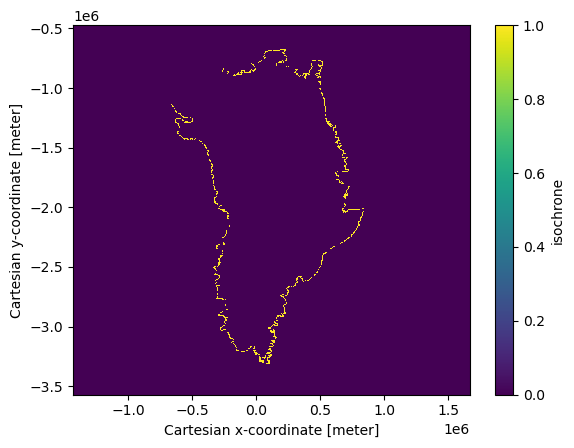

In [5]:
assemble_isochrone('10.5-10', coarsen_factor=25).plot()

In [6]:
model_var = xr.open_dataset(DATA/ 'ncfiles/variable-seasonality.nc')
model_fixed = xr.open_dataset(DATA/ 'ncfiles/fixed-seasonality.nc')

In [11]:
tota_var = []

for i in tqdm(model_var.time): 
    model = model_var.sel(time=i)
    model = model.where(((model.h.x1 > - 60) | (model.h.y1 > 73)))
    model = model.where(((model.h.x1 < - 25) | (model.h.y1 > 67)))
    tota_var.append(model.darea.where(model.h != 0).sum(dim=["x1", "y1"]))

100%|████████████████████████████████████████████████████████████████████████████████| 240/240 [04:15<00:00,  1.06s/it]


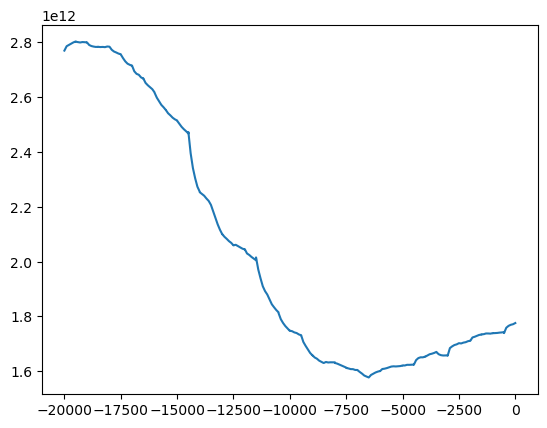

In [13]:
plt.plot(model_var.time, tota_var)

In [14]:
tota_fixed = []

for i in tqdm(model_fixed.time): 
    model = model_fixed.sel(time=i)
    model = model.where(((model.h.x1 > - 60) | (model.h.y1 > 73)))
    model = model.where(((model.h.x1 < - 25) | (model.h.y1 > 67)))
    tota_fixed.append(model.darea.where(model.h != 0).sum(dim=["x1", "y1"]))

100%|████████████████████████████████████████████████████████████████████████████████| 240/240 [04:19<00:00,  1.08s/it]


In [22]:
tota_var = np.asarray(tota_var) #/ (10**6*1000**2)
tota_fixed = np.asarray(tota_fixed)# / (10**6*1000**2)

In [23]:
time_isochrone = [-13500, -12500, -11750, -11250, -10750, -10250, -9750, -9250, -8750, -8250, -7750, -7250, -6750] 
tota_isochrone = [2.6, 2.4, 2.3, 2.25, 2.15, 2.05, 1.95, 1.9, 1.8, 1.775, 1.725, 1.715, 1.7]

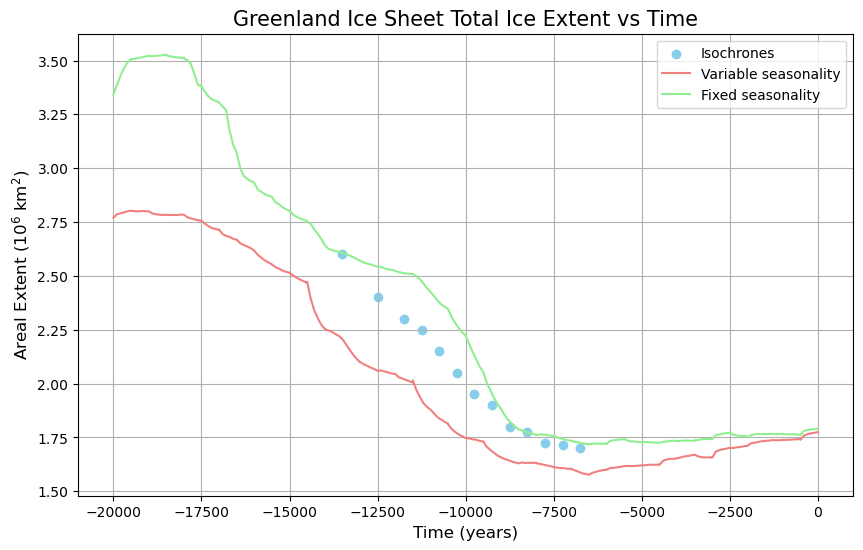

In [26]:
plt.figure(figsize=(10, 6)) 
plt.scatter(time_isochrone, tota_isochrone, label='Isochrones', color='skyblue') 
plt.plot(model_var.time,tota_var, label='Variable seasonality', color='lightcoral')
plt.plot(model_fixed.time, tota_fixed, label='Fixed seasonality', color='lightgreen')
#model_var_tota.plot(label='Variable seasonality', color='lightcoral') 
#model_fixed_tota.plot(label='Fixed seasonality', color='lightgreen') 
plt.title('Greenland Ice Sheet Total Ice Extent vs Time', fontsize=15) 
plt.xlabel('Time (years)', fontsize=12) 
plt.ylabel('Areal Extent ($10^6$ km$^2$)', fontsize=12) 
plt.legend() 
plt.grid(True) 
plt.savefig('total_ice_extent.png')
plt.show()

In [ ]:
def get_contour(model_filepath, year1, year2):

    # load file into memory and select time
    file = xr.open_dataset(model_filepath)
    timeslice = file..sel(
    time=slice(year1, year2)).mean('time') # negative year since time axis is from -22k to 0
    
    # create mask of ice sheet height > 0
    height = timeslice.h
    mask = xr.where(height > 0, 1, 0)

    # use binary erosion to get trace of ice sheet edge
    contour = mask - ndimage.binary_erosion(mask)

    # save as xarray DataArray
    x = mask.x1
    y = mask.y1
    da = xr.DataArray(data = contour, coords = {'x': x, 'y': y})

    return da

In [ ]:
model_14_13 = get_contour(model_filepath, year1, year2):

In [60]:
# Turn model data into isochrones

model_14_13= model_var.sel(time=slice(-14000, -13000)).mean('time')

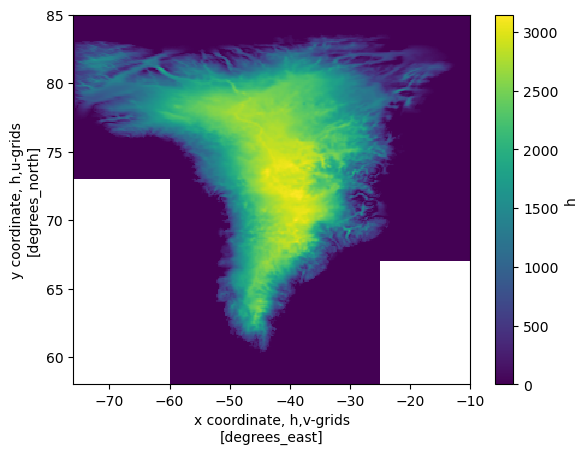

In [72]:
model_14_13 = model_14_13.where(((model_14_13.h.x1 > - 60) | (model_14_13.h.y1 > 73)))
model_14_13 = model_14_13.where(((model_14_13.h.x1 < - 25) | (model_14_13.h.y1 > 67)))
tota = model_14_13.darea.where(model_14_13.h != 0).sum()
model_14_13.h.plot()


In [74]:
tota/ (10**6*1000**2)

<xarray.DataArray 'darea' ()> Size: 8B
array(2.28898557)